Expolatory Data Analysis 


Exploring how the data is present in database and if aggregation is needed to extract any useful data

In [1]:
import pandas as pd
import sqlite3


conn=sqlite3.connect('inventory.db')
tables=pd.read_sql_query("SELECT name from sqlite_master where type='table'",conn)
import sqlite3

In [2]:
for table in tables['name']:
    print('-'*50, f'{table}', '-'*50)
    print('Count of records:', pd.read_sql(f"SELECT COUNT(*) as count FROM [{table}]", conn)['count'].values[0])
    display(pd.read_sql(f"SELECT * FROM [{table}] LIMIT 3 ", conn))


-------------------------------------------------- begin_inventory - Copy --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01


-------------------------------------------------- end_inventory - Copy --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31


-------------------------------------------------- purchases - Copy --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1


-------------------------------------------------- purchase_prices - Copy --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP


-------------------------------------------------- sales - Copy --------------------------------------------------
Count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice - Copy --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None


-------------------------------------------------- vendor_sales_summary --------------------------------------------------
Count of records: 10692


,index,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuant,TotalPurchaseDollars,TotSalesQuantity,TotSalesDollars,TotSalesPrice,TotExciseTax,FreightCost,GrossProfit,ProfitMargin
0,0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977
1,1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628
2,2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758


In [3]:
purchases=pd.read_sql_query("select * from [purchases - Copy] where VendorNumber='4466'",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [4]:
sales = pd.read_sql_query(""" select * from "sales - Copy" where VendorNo='4466'""",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [5]:
purchase_prices=pd.read_sql_query(""" select * from "purchase_prices - Copy" where VendorNumber='4466'LIMIT '5'""",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [6]:
vendor_invoice=pd.read_sql_query(""" select * from "vendor_invoice - Copy" where VendorNumber='4466'""",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [7]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [8]:
sales.groupby('Brand')[['SalesPrice','SalesDollars','SalesQuantity']].sum()

,SalesPrice,SalesDollars,SalesQuantity
Brand,,,
3140,30071.85,50531.10,3890
5215,41542.02,60416.49,4651
5255,51180.60,79187.04,6096


In [9]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [10]:
freight_summary=pd.read_sql_query("""select VendorNumber,SUM(Freight) as FreightCost 
                                  From [vendor_invoice - Copy]
                                  Group by VendorNumber""",conn)

In [11]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [12]:

# for insigths refernce


pd.read_sql_query("""SELECT 
                  p.VendorNumber,
                  p.VendorName,
                  p.Brand,
                  p.PurchasePrice,
                  pp.Volume,
                  pp.Price as ActualPrice,
                  SUM(p.Quantity) as ActualPUrchaseQua,
                  sum(p.Dollars)  as TotalPurchaseDollars
                  FROM 'purchases - Copy' p
                  JOIN 'purchase_prices - Copy' pp
                  on p.brand=pp.brand
                  where p.PurchasePrice>0
                  GROUP BY p.VendorNumber , p.VendorName ,p.Brand
                  ORDER By TotalPurchaseDollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,ActualPUrchaseQua,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [13]:

# for insigths refernce

pd.read_sql_query("""SELECT 
                  VendorNo,
                  Brand,
                  
                  SUM(SalesPrice)   as TotSalesPrice,
                  SUM(SalesQuantity)   as TotSalesQuant,
                  SUM(ExciseTax)   as TotExciseTax,
                  SUM(SalesDollars) as TotSalesDollars
                  FROM 'sales - Copy'
                  GROUP BY VendorNo, Brand
                  ORDER BY TotSalesDollars""",conn)

,VendorNo,Brand,TotSalesPrice,TotSalesQuant,TotExciseTax,TotSalesDollars
0,8004,5287,0.98,2,0.10,0.98
1,9206,2773,0.99,1,0.05,0.99
2,3252,3933,0.99,2,0.10,1.98
3,3924,9123,0.99,2,0.10,1.98
4,10050,3623,1.98,2,0.10,1.98
...,...,...,...,...,...,...
11267,3960,3545,545778.28,135838,249587.83,4223107.62
11268,3960,4261,420050.01,200412,368242.80,4475972.88
11269,17035,8068,461140.15,187140,343854.07,4538120.60
11270,4425,3405,561512.37,160247,294438.66,4819073.49


In [14]:
vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
    SELECT 
        VendorNumber,
        VendorName,
        SUM(Freight) AS FreightCost
    FROM 'vendor_invoice - Copy'
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT 
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Volume,
        pp.Price AS ActualPrice,
        SUM(p.Quantity) AS TotalPurchaseQuant,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM 'purchases - Copy' p
    JOIN 'purchase_prices - Copy' pp ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY 
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price,
        pp.Volume
),

SalesSummary AS (
    SELECT 
        VendorNo,
        Brand,
        SUM(SalesPrice) AS TotSalesPrice,
        SUM(SalesQuantity) AS TotSalesQuantity,
        SUM(ExciseTax) AS TotExciseTax,
        SUM(SalesDollars) AS TotSalesDollars
    FROM 'sales - Copy'
    GROUP BY VendorNo, Brand
)

SELECT 
    ps.VendorNumber,
    ps.VendorName,
    ps.Description,
    ps.Brand,
    ps.PurchasePrice,
    ps.Volume,
    ps.TotalPurchaseQuant,
    ps.TotalPurchaseDollars,
    ss.TotSalesQuantity,
    ss.TotSalesDollars,
    ss.TotSalesPrice,
    ss.TotExciseTax,
    fs.FreightCost

FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber

ORDER BY ps.TotalPurchaseDollars DESC
""", conn)


In [15]:
vendor_sales_summary

,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuant,TotalPurchaseDollars,TotSalesQuantity,TotSalesDollars,TotSalesPrice,TotExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50,2,1.48,2.0,1.98,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [16]:
vendor_sales_summary.fillna(0,inplace=True)


In [17]:
vendor_sales_summary['VendorName'].str.strip()

0               BROWN-FORMAN CORP
1           MARTIGNETTI COMPANIES
2               PERNOD RICARD USA
3        DIAGEO NORTH AMERICA INC
4        DIAGEO NORTH AMERICA INC
                   ...           
10687              WINE GROUP INC
10688              SAZERAC CO INC
10689    HEAVEN HILL DISTILLERIES
10690    DIAGEO NORTH AMERICA INC
10691        PROXIMO SPIRITS INC.
Name: VendorName, Length: 10692, dtype: object

In [18]:
cursor=conn.cursor()

In [19]:
vendor_sales_summary['GrossProfit']=vendor_sales_summary['TotSalesDollars']-vendor_sales_summary['TotalPurchaseDollars']

vendor_sales_summary['ProfitMargin']=vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotSalesDollars']

In [30]:
cursor.execute("""CREATE TABLE IF NOT EXISTS vendor_sales_summary(
               VendorNumber INT,
               VendorName CHAR(100),
               Brand INT,
               Description VARCHAR(100), 
               PurchasePrice DECIMAL(100,2),
               Volume ,
               TotalPurchaseQunat INT,
               TotalPurchaseDollars DECIMAL(15,2),
               TotSalesQuantity INT ,
               TotSalesDollars DECIMAL(15,2),
               TotSalesPrice DECIMAL(15,2),
               TotalExciseTax DECIMAL(15,2),
               FreightCost DECIMAL(15,2),
               GrossProfit DECIMAL(15,2),
               ProfitMargin DECIMAL(15,2),

               PRIMARY KEY(VendorNumber,Brand));
""")

In [21]:
pd.read_sql_query('SELECT * FROM vendor_sales_summary',conn)

,index,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuant,TotalPurchaseDollars,TotSalesQuantity,TotSalesDollars,TotSalesPrice,TotExciseTax,FreightCost,GrossProfit,ProfitMargin
0,0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977
1,1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628
2,2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758
3,3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399
4,4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,10687,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483
10688,10688,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362
10689,10689,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525
10690,10690,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740


In [22]:
vendor_sales_summary.to_sql('vendor_sales_summary',conn,if_exists='replace')

10692

In [ ]:
vendor_sales_summary

,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuant,TotalPurchaseDollars,TotSalesQuantity,TotSalesDollars,TotSalesPrice,TotExciseTax,FreightCost,GrossProfit,ProfitMargin
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483
10688,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362
10689,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525
10690,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740


In [23]:
vendor_sales_summary.describe()

,VendorNumber,Brand,PurchasePrice,TotalPurchaseQuant,TotalPurchaseDollars,TotSalesQuantity,TotSalesDollars,TotSalesPrice,TotExciseTax,FreightCost,GrossProfit,ProfitMargin
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04
mean,10650.649458,18039.228769,24.385303,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf
std,18753.519148,12662.187074,109.269375,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN
min,2.000000,58.000000,0.360000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-inf
25%,3951.000000,5793.500000,6.840000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e-01
50%,7153.000000,18761.500000,10.455000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e-01
75%,9552.000000,25514.250000,19.482500,1975.750000,2.073825e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e-01
max,201359.000000,90631.000000,5681.810000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e-01


GRAPHICAL ANALYSIS 

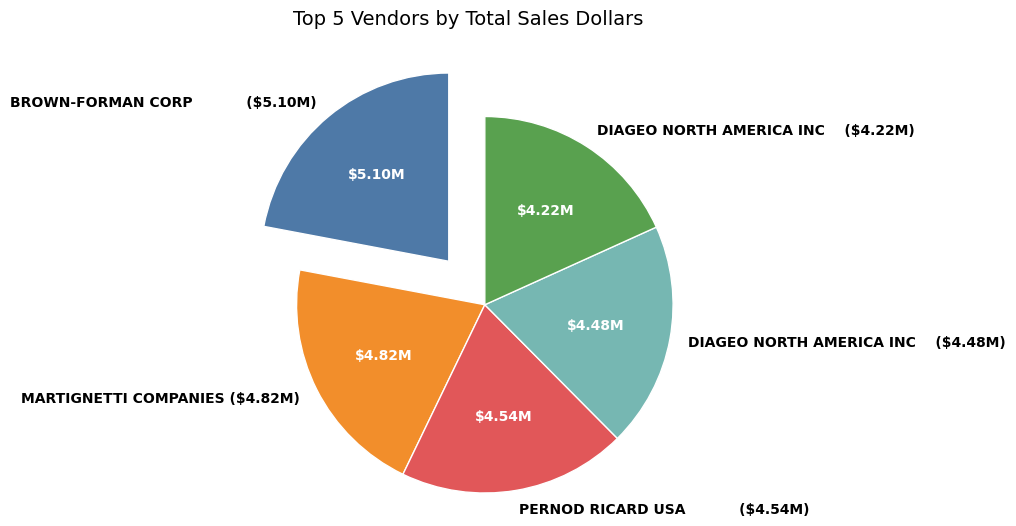

In [ ]:
import matplotlib.pyplot as plt
query = """
SELECT VendorName, TotSalesDollars
FROM vendor_sales_summary
ORDER BY TotSalesDollars DESC
LIMIT 5
"""
df = pd.read_sql_query(query, conn)

labels = [f"{row['VendorName']} (${row['TotSalesDollars'] / 1e6:.2f}M)" for _, row in df.iterrows()]
sizes = df['TotSalesDollars']
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']
explode = (0.3, 0, 0, 0, 0)  

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct=lambda p: f'${(p * sum(sizes) / 100) / 1e6:.2f}M',
                                   startangle=90, textprops={'fontsize': 10, 'color': 'white', 'weight': 'bold'},
                                   wedgeprops={'edgecolor': 'white'})

plt.title('Top 5 Vendors by Total Sales Dollars', fontsize=14, pad=20)
plt.axis('equal') 


for text in texts:
    text.set_fontsize(10)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# plt.savefig('vendor_pie_chart.png', dpi=300)
plt.show()